**2. Initializing the Colab environment**

In [ ]:
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

--2024-08-27 17:05:43--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip’

bike+sharing+datase     [  <=>               ] 273.43K  1.14MB/s    in 0.2s    

2024-08-27 17:05:44 (1.14 MB/s) - ‘bike+sharing+dataset.zip’ saved [279992]

Archive:  bike+sharing+dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [ ]:
import pandas as pd

**3. Data Engineering**

*Data Collection*

In [ ]:
df=pd.read_csv("hour.csv")
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

*Data Processing*

In [ ]:
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_night
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,night
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,night
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,night
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,night
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,night
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,night
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,night
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,night


In [ ]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,night
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,night
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,night
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,night
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119,night
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89,night
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90,night
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61,night


In [ ]:
# Separating features and target variable
X = df.drop(columns=['cnt']) # Features
y = df['cnt'] # Target
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day_night
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,night
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,night
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,night
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,night
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,night
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,night
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,night
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,night


*Create Pipelines for Numerical and Categorical Features*

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Numerical features
numerical_features = ['temp', 'hum', 'windspeed']
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')), # Impute missing values with mean
('scaler', MinMaxScaler()) # Normalize using MinMaxScaler
])
# Transforming above
X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])
# Categorical features
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(sparse_output=False, drop='first'))
])
# Transforming above
X_encoded = categorical_pipeline.fit_transform(X[categorical_features])
# Converting it to a dataframe
X_encoded = pd.DataFrame(X_encoded,columns=categorical_pipeline.named_steps['onehot'].get_feature_names_out(categorical_features))
# Encoded categorical features + Numerical features
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)
#Split the data (20:80 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

**4. Model Developmentt**

Model Selection:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Visualize the importance of each feature: -

<Axes: >

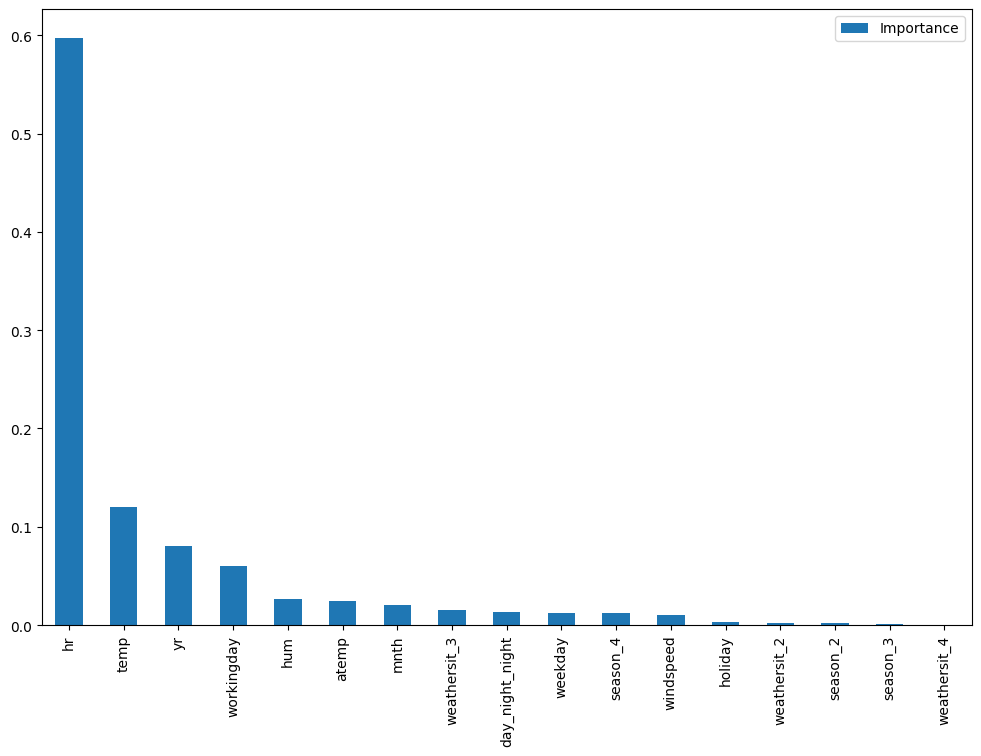

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns,
columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# Plotting each feature importance
feat_importances.plot(kind='bar', figsize=(12,8))

Model Evaluation:

In [ ]:
# Predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1808.4074990292243
R-squared: 0.9428901308176855


**ML PIPELINE**

In [ ]:

from sklearn import set_config
final_pipeline = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
set_config(display='diagram')# To display
final_pipeline

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehot',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False))])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  cnt         17379 non-null  int64   
 13  day_night   17379 non-null  object  
dtypes: category(8), float64(4), int64(1), object(1)
memory usage: 952.8+ KB


In [ ]:
df.describe()

,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,189.463088
std,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,40.000000
50%,0.500000,0.484800,0.630000,0.194000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,1.000000,1.000000,0.850700,977.000000


In [ ]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,night
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,night
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,night
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,night
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119,night
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89,night
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90,night
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61,night


Assignment: Enhancing and Optimizing an MLOps Pipeline

Objective:

The goal of this assignment is to extend the MLOps pipeline you’ve built during the lab
sessions. You will explore strategies to enhance feature engineering, model selection,
preprocessing techniques, and pipeline automation. The objective remains to predict the
number of bike rentals (target variable: cnt) using the Bike Sharing dataset but with
added complexity and optimization.


**1. Create at least two new interaction features between numerical variables (e.g.,
temp * hum). Justify your choice of features and explain how they might
improve the model's predictive performance.**

In [ ]:
# Convert categorical columns to numeric
categorical_cols = ['season',	'yr',	'mnth',	'hr',	'holiday',	'weekday',	'workingday',	'weathersit']
for col in categorical_cols:
    df[col] = df[col].astype(float)

df['temp_hour_interaction'] = df['temp'] * df['hr']
df['season_hour_interaction'] = df['season'] * df['hr']
df = df1
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   17379 non-null  float64
 1   yr                       17379 non-null  float64
 2   mnth                     17379 non-null  float64
 3   hr                       17379 non-null  float64
 4   holiday                  17379 non-null  float64
 5   weekday                  17379 non-null  float64
 6   workingday               17379 non-null  float64
 7   weathersit               17379 non-null  float64
 8   temp                     17379 non-null  float64
 9   atemp                    17379 non-null  float64
 10  hum                      17379 non-null  float64
 11  windspeed                17379 non-null  float64
 12  cnt                      17379 non-null  int64  
 13  day_night                17379 non-null  object 
 14  temp_hour_interaction 

By evaluating the MSE for each interaction feature individually, we can identify which interaction feature or combination of features improves the Linear Regression model's performance. This process will helps to understand which features are most beneficial for capturing the underlying patterns in the data.

so,
temp_hour_interaction: 21926.78 - Lowest MSE - Best feature for improving model performance.
season_hour_interaction: 26372.86

these are the best features which can improve the model performance.

**2. Replace the OneHotEncoder with TargetEncoder for categorical variables.
Evaluate how this change impacts the model's performance compared to one-hot
encoding.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce


In [ ]:
# Define categorical and numerical features
categorical_features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'hr']

# Define the target variable
target = 'cnt'

# Prepare features and target
X = df[categorical_features + numerical_features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize TargetEncoder
target_encoder = ce.TargetEncoder(cols=categorical_features)

# Fit and transform the training data
X_train_encoded = target_encoder.fit_transform(X_train, y_train)

# Transform the test data
X_test_encoded = target_encoder.transform(X_test)


In [ ]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_encoded)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE with Target Encoding: {mse:.2f}')


Linear Regression MSE with Target Encoding: 20846.34


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# Apply OneHotEncoder
X_train_encoded_ohe = preprocessor.fit_transform(X_train)
X_test_encoded_ohe = preprocessor.transform(X_test)

# Train and evaluate with OneHotEncoder
lr_model_ohe = LinearRegression()
lr_model_ohe.fit(X_train_encoded_ohe, y_train)
y_pred_ohe = lr_model_ohe.predict(X_test_encoded_ohe)
mse_ohe = mean_squared_error(y_test, y_pred_ohe)
print(f'Linear Regression MSE with One-Hot Encoding: {mse_ohe:.2f}')


Linear Regression MSE with One-Hot Encoding: 20318.12


SO,here we have lower MSE in One-Hot Encoder and lowetr denotes that it is better than Target Encoding.

**Train LinearRegressor:**

a. Using the package,

b. Write/Train it by scratch following the steps of a linear regressor.
Compare their performance using metrics like Mean Squared Error (MSE)
and R-squared.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare the data
df = pd.read_csv('hour.csv')

# Convert categorical columns to numeric
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    df[col] = df[col].astype(float)

df['temp_hour_interaction'] = df['temp'] * df['hr']
df['season_hour_interaction'] = df['season'] * df['hr']

df.info()

categorical_features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'yr', 'hum', 'windspeed', 'hr', 'temp_hour_interaction', 'season_hour_interaction', 'mnth']
target = 'cnt'

# Prepare features and target
X = df[categorical_features + numerical_features]
y = df[target]

# Define the pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoding categorical features
])

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Create the final pipeline combining preprocessing and Linear Regression
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Using Linear Regression model
])

# Set the display configuration to show the pipeline diagram
set_config(display='diagram')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
final_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = final_pipeline.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MSE: {mse:.2f}')
print(f'Linear Regression R^2: {r2:.2f}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   instant                  17379 non-null  int64  
 1   dteday                   17379 non-null  object 
 2   season                   17379 non-null  float64
 3   yr                       17379 non-null  float64
 4   mnth                     17379 non-null  float64
 5   hr                       17379 non-null  float64
 6   holiday                  17379 non-null  float64
 7   weekday                  17379 non-null  float64
 8   workingday               17379 non-null  float64
 9   weathersit               17379 non-null  float64
 10  temp                     17379 non-null  float64
 11  atemp                    17379 non-null  float64
 12  hum                      17379 non-null  float64
 13  windspeed                17379 non-null  float64
 14  casual                

In [ ]:
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'atemp', 'yr', 'hum',
                                                   'windspeed', 'hr',
                                                   'temp_hour_interaction',
                                                   'season_hour_interaction',
                                                   'mnth']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['season', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('model', LinearRegression())])